<a href="https://colab.research.google.com/github/TunanHuang/R_Plaque_Visualization/blob/main/%E6%AF%95%E8%AE%BE715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git


In [ ]:
import snscrape.modules.twitter as sntwitter


ModuleNotFoundError: ignored

In [ ]:
import pandas as pd

In [ ]:
!pip install langid
import langid
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ChatGPT since:2023-06-01 until:2023-06-03').get_items()):
    if i>2000:
        break
    # Check the language of the tweet
    language = langid.classify(tweet.content)[0]

    # Append only English tweets to the list
    if language == 'en':
        tweets_list.append([tweet.date, tweet.user.location, tweet.content, tweet.user.username])

# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Location', 'Text', 'Username'])
tweets_df

In [ ]:
# Dropping the 'Datetime' column
#tweets_df = tweets_df.drop('Datetime', axis=1)

# Save the dataframe to a CSV file
tweets_df.to_csv('twitter_data_62.csv', index=False)

In [ ]:
import pandas as pd

# 定义四个 CSV 文件的文件名
file_names = ['twitter_data_62.csv', 'twitter_data_52.csv', 'twitter_data_42.csv', 'twitter_data_32.csv']

# 创建一个空的 DataFrame
combined_df = pd.DataFrame()

# 循环读取并合并每个 CSV 文件
for file in file_names:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 将合并后的 DataFrame 保存到新的 CSV 文件
combined_df.to_csv('combined_tweets.csv', index=False)


In [ ]:
#importing the training data
sentiment_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/ChatGPT Sentiment.csv')
sentiment_dataset=sentiment_dataset[:250000]
print(sentiment_dataset.shape)
sentiment_dataset.head(10)
#sentiment count
sentiment_dataset['labels'].value_counts()


(219294, 3)


bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
label_counts = sentiment_dataset.groupby('labels').size()
print(label_counts)

labels
bad        107796
good        56011
neutral     55487
dtype: int64


In [ ]:
import random

# 按标签进行分组
grouped_data = sentiment_dataset.groupby('labels')

# 获取负面标签组
negative_group = grouped_data.get_group('bad')

# 随机选择一半的样本
half_negative = negative_group.sample(frac=0.5, random_state=42)

# 合并负面、正面和中性标签的样本
filtered_dataset = pd.concat([half_negative, grouped_data.get_group('good'), grouped_data.get_group('neutral')])

# 打乱顺序
sentiment_dataset = filtered_dataset.sample(frac=1, random_state=42)

# 打印打乱顺序后的数据集形状
print(sentiment_dataset.shape)

sentiment_dataset['labels'].value_counts()


(165396, 3)


good       56011
neutral    55487
bad        53898
Name: labels, dtype: int64

In [ ]:
#sentiment count
sentiment_dataset['labels'].value_counts()

good       56011
neutral    55487
bad        53898
Name: labels, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
#from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
from bs4 import BeautifulSoup
import re,string,unicodedata
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#from nltk.stem.porter import PorterStemmer
# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Removing the html strips
#def strip_html(text):
    #soup = BeautifulSoup(text, "html.parser")
    #return soup.get_text()

def remove_http(text):
    cleaned_text = re.sub(r"\bhttp\w+", "", text)
    return cleaned_text

#Removing the square brackets 好像也没有
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special characters and punctuations
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

#Removing the noisy text
def clean_text(text):
    text = remove_http(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text
#Apply function on twitter column
sentiment_dataset['tweets']=sentiment_dataset['tweets'].apply(clean_text)
sentiment_dataset.head(10)

,Unnamed: 0,tweets,labels
0,0,ChatGPT Optimizing Language Models for Dialogu...,neutral
1,1,Try talking with ChatGPT our new AI system whi...,good
2,2,ChatGPT Optimizing Language Models for Dialogu...,neutral
3,3,THRILLED to share that ChatGPT our new model o...,good
4,4,As of 2 minutes ago OpenAI released their new ...,bad
5,5,Just launched ChatGPT our new AI system which ...,good
6,6,As of 2 minutes ago OpenAI released their new ...,bad
7,7,ChatGPT coming out strong refusing to help me ...,good
8,8,0penAl just deployed a thing Ive been helping ...,good
9,9,Research preview of our newest model ChatGPTnn...,neutral


In [ ]:
#Text lemmatizing

# Initialize the WordNet lemmatizer
wnl = WordNetLemmatizer()

# Lemmatizing the text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # 分词
    lemmatized_tokens = [wnl.lemmatize(word) for word in tokens]  # 词形还原
    lemmatized_text = ' '.join(lemmatized_tokens)  # 连接词形还原后的词语
    return lemmatized_text
#Apply function on twitter column
sentiment_dataset['tweets']=sentiment_dataset['tweets'].apply(lemmatize_text)

In [ ]:
#Stemming the text 使用的是词干提取器（stemmer）而不是词形还原器（lemmatizer）。相比于词形还原，词干提取是一种更加简化的文本处理方法，它会将单词的词干提取出来，但不会考虑单词的上下文和语法。
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on twitter column
sentiment_dataset['tweets']=sentiment_dataset['tweets'].apply(simple_stemmer)


In [ ]:
sentiment_dataset['tweets']

182133    Absorb Cultivate Crystallize nnThe Formula nCh...
49924     ChatGPT is down I guess too many people got ex...
54506     ChatGPTnlooks like chatGPT executes python cod...
51822     Hey OpenAI and SierraGames you need to partner...
49954     Theres going to be a point for developer when ...
                                ...                        
39230     OpenAIs latest product ChatGPT is all over the...
194704    Google management on alert after seeing ChatGP...
88015        Phew My job is safe ChatGPT httpstco7JNfZARfHU
147539    Asked ChatGPT on how can we a a citizen can im...
47617      ChatGPT is better than google httpstcoJ55jWAarZZ
Name: tweets, Length: 165396, dtype: object

In [ ]:
#Stopwords removing

#set stopwords to english #这有什么意义吗
#stop=set(stopwords.words('english'))
#print(stop)


#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#removing the stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on twitter column
sentiment_dataset['tweets']=sentiment_dataset['tweets'].apply(remove_stopwords)



In [ ]:
text=sentiment_dataset['tweets']
text

182133    absorb cultivate crystallize nnthe formula nch...
49924                 chatgpt guess many people got excited
54506     chatgptnlooks like chatgpt executes python cod...
51822     hey openai sierragames need partner ive making...
49954     theres going point developer greater loss prod...
                                ...                        
39230     openais latest product chatgpt internet since ...
194704    google management alert seeing chatgpts potent...
88015              phew job safe chatgpt httpstco7jnfzarfhu
147539    asked chatgpt citizen improve pune httpstcodb2...
47617              chatgpt better google httpstcoj55jwaarzz
Name: tweets, Length: 165396, dtype: object

In [ ]:
#Build a function for training the SVM classifieR
def run_svm(df):
    #define the dependend and independent variables
    X=df['tweets']
    y=df['labels']

    # create features of the independent variable, convert text to numerical representation
    tfidf=TfidfVectorizer()
    X=tfidf.fit_transform(X)

    # Define the training regime
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

    #train classifier
    clf=LinearSVC()
    clf.fit(X_train,y_train)


    #generate predicted values
    y_pred=clf.predict(X_test)

    #produce report
    print()
    print('Report')
    print(classification_report(y_test,y_pred))

    return tfidf, clf

tfidf, clf=run_svm(sentiment_dataset)


Report
              precision    recall  f1-score   support

         bad       0.86      0.96      0.90     21559
        good       0.80      0.81      0.81     11202
     neutral       0.74      0.55      0.63     11098

    accuracy                           0.82     43859
   macro avg       0.80      0.77      0.78     43859
weighted avg       0.81      0.82      0.81     43859



In [ ]:
#ChatGPT_tweet = pd.read_csv('/content/combined_tweets.csv', engine='c', encoding='latin-1',  nrows=3000)
ChatGPT_tweet = pd.read_csv('/content/combined_tweets.csv', engine='c', encoding='latin-1')
ChatGPT_tweet=ChatGPT_tweet[['Datetime','Text','Location']]
# 重命名列名
ChatGPT_tweet = ChatGPT_tweet.rename(columns={'Text': 'Tweet'})

In [ ]:
ChatGPT_tweet.head(5)

,Datetime,Tweet,Location
0,2023-06-02 13:54:03+00:00,ChatGPT again? https://t.co/BC6OBncfKF,NaN
1,2023-06-02 13:54:00+00:00,The biggest tech threat to creators is not Cha...,"Knoxville, TN"
2,2023-06-02 13:54:00+00:00,daintily picking with their chopsticks fish an...,NaN
3,2023-06-02 13:53:59+00:00,@eperea Â¿Es ChatGPT?,MÃ©xico
4,2023-06-02 13:53:58+00:00,@OsintTV Pakxtaniz used chatGPT to genrate tha...,NaN


In [ ]:
def remove_keyword(text):
    # 使用正则表达式进行替换操作，不区分大小写
    cleaned_text = re.sub(r"(?i)Chatgpt", "", text)
    cleaned_text = re.sub(r"(?i)Chat", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)GPT", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Chatbot", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Open", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)AI", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Use", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)MachineLearning", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)ArtificialIntelligence", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Wa", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Ha", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Use", "", cleaned_text)
    cleaned_text = re.sub(r"(?i)Using", "", cleaned_text)
    #cleaned_text = re.sub(r"\bhttp\w+", "", cleaned_text)


    return cleaned_text



'ct is '

In [ ]:
#Apply function on twitter column
def process_data(df):
   df=clean_text(df)
   df=lemmatize_text(df)
   df=remove_stopwords(df)
   df=remove_keyword(df)

   return df
# 对'twitter'列应用process_data函数
ChatGPT_tweet['Tweet'] = ChatGPT_tweet['Tweet'].apply(process_data) #该函数的实现需要处理单个文本列 这可以通过使用apply函数来完成 而不是直接把整个传入

In [ ]:
ChatGPT_tweet.head(5)

,Datetime,Tweet,Location,Sentiment
0,2023-06-02 13:54:03+00:00,,NaN,bad
1,2023-06-02 13:54:00+00:00,biggest tech threat creator via markwscefer,"Knoxville, TN",bad
2,2023-06-02 13:54:00+00:00,dntily picking chopstick fish vegetable cheap ...,NaN,bad
3,2023-06-02 13:53:59+00:00,eperea e,MÃ©xico,bad
4,2023-06-02 13:53:58+00:00,osinttv pakxtaniz genrate english text like ne...,NaN,neutral


In [ ]:
def sentiment_analysis(data):
  data=tfidf.transform([data])
  sentiment=clf.predict(data)
  return sentiment[0]
ChatGPT_tweet['Sentiment'] = ChatGPT_tweet['Tweet'].apply(sentiment_analysis)

In [ ]:
ChatGPT_tweet.head(10)


,Datetime,Tweet,Location,Sentiment
0,2023-06-02 13:54:03+00:00,,NaN,bad
1,2023-06-02 13:54:00+00:00,biggest tech threat creator via markwscefer,"Knoxville, TN",bad
2,2023-06-02 13:54:00+00:00,dntily picking chopstick fish vegetable cheap ...,NaN,bad
3,2023-06-02 13:53:59+00:00,eperea e,MÃ©xico,bad
4,2023-06-02 13:53:58+00:00,osinttv pakxtaniz genrate english text like ne...,NaN,neutral
5,2023-06-02 13:53:56+00:00,amazing know latest shopping app temu forgood,NaN,good
6,2023-06-02 13:53:56+00:00,generative narcissist,Dostoevsky's head,bad
7,2023-06-02 13:53:55+00:00,eliasmrtnz1 edgecase411 joetegtmeyer choose ke...,"Austin, TX",good
8,2023-06-02 13:53:47+00:00,yhdf r lll leave another land,NaN,bad
9,2023-06-02 13:53:43+00:00,still terrible ap english language literature ...,NaN,bad


bad        2131
good       1139
neutral     610
Name: Sentiment, dtype: int64


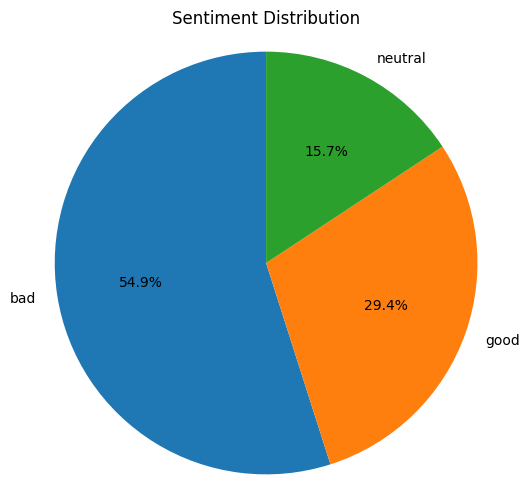

In [ ]:
import matplotlib.pyplot as plt

# 计算每个情感类别的数量
sentiment_counts = ChatGPT_tweet['Sentiment'].value_counts()
print(sentiment_counts)
# 生成饼图
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

# 保存饼图到CSV文件
sentiment_counts.to_csv('sentiment_counts.csv')

# 根据情感类别将数据分割成不同的数据框
bad_data = ChatGPT_tweet[ChatGPT_tweet['Sentiment'] == 'bad']
good_data = ChatGPT_tweet[ChatGPT_tweet['Sentiment'] == 'good']
neutral_data = ChatGPT_tweet[ChatGPT_tweet['Sentiment'] == 'neutral']

# 保存分割后的数据到不同的CSV文件
bad_data.to_csv('bad_data.csv', index=False)
good_data.to_csv('good_data.csv', index=False)
neutral_data.to_csv('neutral_data.csv', index=False)


In [ ]:
import pandas as pd
!pip install pandas gensim
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

%matplotlib inline


def lda(df):

    data=df['Tweet']
    # 分词处理
    tokenized_data = [word_tokenize(text) for text in data]

    # 创建词典
    dictionary = corpora.Dictionary(tokenized_data)

    # 创建文档-词频矩阵
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_data]

    # LDA模型训练
    num_topics = 5  # 设定主题数量
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,random_state=1)

    topic_list = lda_model.print_topics()
    return topic_list

# 读取Excel文件
df_good = pd.read_csv('/content/good_data.csv')
df_good = df_good.dropna(subset=['Tweet'])  # 删除包含缺失值的行
lda(df_good)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[(0,
  '0.009*"like" + 0.008*"prompt" + 0.007*"get" + 0.006*"code" + 0.005*"new" + 0.004*"write" + 0.004*"know" + 0.004*"amazing" + 0.004*"better" + 0.004*"4"'),
 (1,
  '0.006*"like" + 0.005*"im" + 0.005*"book" + 0.003*"information" + 0.003*"answer" + 0.003*"dont" + 0.003*"see" + 0.003*"know" + 0.003*"even" + 0.003*"write"'),
 (2,
  '0.011*"like" + 0.006*"tool" + 0.005*"time" + 0.004*"thread" + 0.004*"model" + 0.004*"intelligence" + 0.004*"database" + 0.004*"get" + 0.004*"great" + 0.003*"one"'),
 (3,
  '0.009*"like" + 0.006*"world" + 0.005*"say" + 0.005*"dont" + 0.004*"good" + 0.004*"great" + 0.004*"create" + 0.004*"prompt" + 0.004*"one" + 0.004*"free"'),
 (4,
  '0.009*"like" + 0.006*"one" + 0.005*"thing" + 0.004*"could" + 0.004*"write" + 0.004*"code" + 0.004*"free" + 0.004*"better" + 0.004*"api" + 0.003*"question"')]

In [ ]:
df_neutral = pd.read_csv('/content/neutral_data.csv')
df_neutral = df_neutral.dropna(subset=['Tweet'])  # 删除包含缺失值的行
lda(df_neutral)



[(0,
  '0.009*"bot" + 0.007*"time" + 0.006*"better" + 0.006*"like" + 0.006*"know" + 0.005*"prompt" + 0.005*"could" + 0.005*"write" + 0.004*"get" + 0.004*"make"'),
 (1,
  '0.009*"write" + 0.006*"good" + 0.005*"data" + 0.004*"model" + 0.004*"like" + 0.004*"time" + 0.004*"ive" + 0.003*"new" + 0.003*"could" + 0.003*"still"'),
 (2,
  '0.018*"like" + 0.005*"work" + 0.004*"google" + 0.004*"interesting" + 0.004*"good" + 0.003*"better" + 0.003*"say" + 0.003*"thing" + 0.003*"one" + 0.003*"new"'),
 (3,
  '0.011*"like" + 0.007*"prompt" + 0.005*"data" + 0.004*"4" + 0.004*"would" + 0.004*"one" + 0.004*"dont" + 0.004*"question" + 0.004*"know" + 0.003*"tool"'),
 (4,
  '0.008*"im" + 0.006*"like" + 0.005*"business" + 0.005*"people" + 0.005*"new" + 0.004*"generative" + 0.004*"data" + 0.004*"prompt" + 0.004*"may" + 0.004*"tool"')]

In [ ]:
df_bad = pd.read_csv('/content/bad_data.csv')
df_bad = df_bad.dropna(subset=['Tweet'])  # 删除包含缺失值的行
lda(df_bad)


[(0,
  '0.014*"token" + 0.009*"response" + 0.009*"say" + 0.009*"know" + 0.008*"api" + 0.007*"information" + 0.006*"dont" + 0.006*"build" + 0.006*"future" + 0.006*"got"'),
 (1,
  '0.013*"write" + 0.012*"naked" + 0.010*"say" + 0.009*"im" + 0.008*"asked" + 0.007*"people" + 0.007*"correct" + 0.007*"news" + 0.006*"thing" + 0.006*"position"'),
 (2,
  '0.010*"start" + 0.009*"topic" + 0.008*"think" + 0.008*"get" + 0.007*"middle" + 0.006*"asking" + 0.006*"real" + 0.006*"someone" + 0.006*"twitter" + 0.006*"thread"'),
 (3,
  '0.052*"prompt" + 0.044*"bot" + 0.014*"marketing" + 0.011*"writingprompts" + 0.011*"creativeprompts" + 0.011*"ideaprompts" + 0.009*"eml" + 0.006*"ruby" + 0.006*"get" + 0.006*"via"'),
 (4,
  '0.012*"know" + 0.010*"question" + 0.009*"u" + 0.008*"answer" + 0.008*"youre" + 0.006*"people" + 0.006*"think" + 0.006*"write" + 0.006*"google" + 0.006*"many"')]

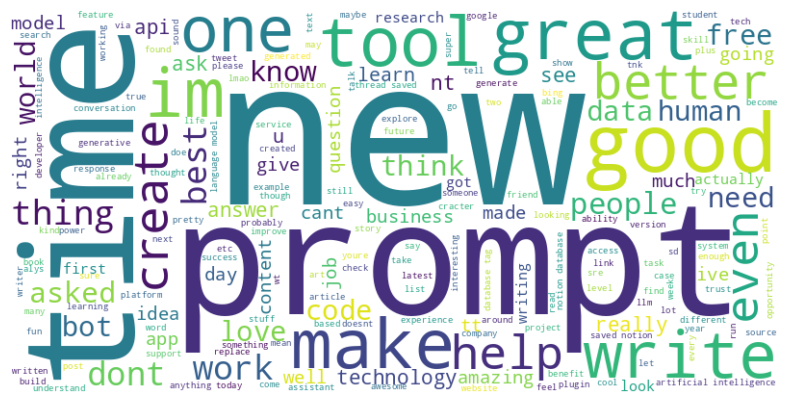

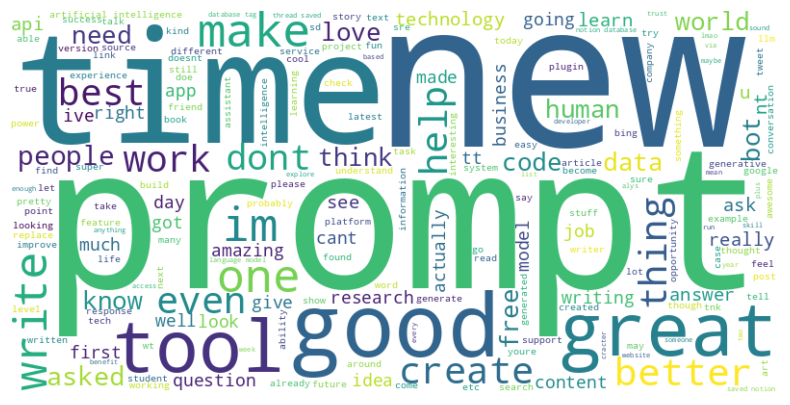

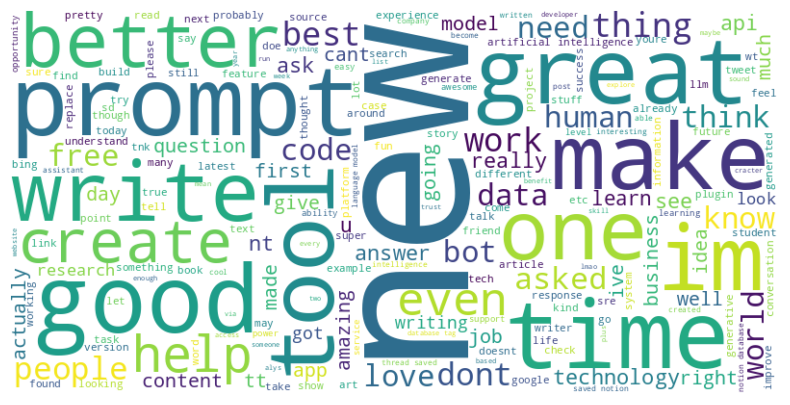

In [ ]:
def cloud(df):

    Tweets = df_good['Tweet'].astype(str).tolist()
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    # 将列表中的文本拼接成一个字符串
    text = ' '.join(Tweets)

    # 创建词云对象
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # 绘制词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

cloud(df_good)
cloud(df_bad)
cloud(df_neutral)

In [ ]:
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

import spacy
from nltk.corpus import stopwords


# for plotting
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
import spacy
import pandas as pd
from nltk.corpus import stopwords
import os

spacy.load("en_core_web_sm")


IN_PATH = '/content/good_data.csv'
FILE_NAME = 'tweet.csv'
OUT_PATH = 'sa.csv'

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load('en', disable=['parser', 'ner'])

mallet_path = os.path.join(OUT_PATH, './mallet-2.0.8/bin/mallet')
df=pd.read_csv('/content/combined_tweets.csv')


In [ ]:
df=pd.read_csv('/content/good_data.csv')
# Convert the body of the emails to a list
data = df['Tweet'].tolist()

# Convert the list of sentence into list of words <> Tokenizing

# 分词处理
tokenized_data = [word_tokenize(text) for text in data]


print(tokenized_data)

[['amazing', 'know', 'latest', 'shopping', 'app', 'temu', 'forgood'], ['eliasmrtnz1', 'edgecase411', 'joetegtmeyer', 'choose', 'keep', 'category', 'description', 'recommend', 'reword'], ['amazing', 'doe', 'know', 'everything', 'holi'], ['buhle590', 'citypowerjhb', 'wts', 'really', 'ppening', 'city', 'power', 'fled', 'entity', 'effectively', 'mntning', 'network', 'call', 'center', 'agent', 'cant', 'anything', 'give', 'response', 'technician', 'colleague', 'drive', 'around', 'cluelessly', 'pretending', 'work', 'new', 'norm'], ['roxcodes', 'please', 'write', 'script', 'upload', 'file', 's3', 'gcp', 'work', 'well', 'also', 'terraform', 'instead', 'vanilla', 'ui', 'give', 'follow', 'sidpalas', 'learn', 'work'], ['travel', 'adventure', 'rse', 'hope', 'question', 'phocuswire'], ['im', 'generate', 'sculpture', 'made', 'famous', 'actress', 'fun', 'bit', 'stopped', 'looking', 'like', 'sculpture', 'marilynmonroe'], ['artificial', 'general', 'intelligence', 'illusion', 'understanding', 'check', 'g

In [ ]:
#这个过程的目的是为了提取文本数据中的短语和多词表达，例如将 "New York" 组合成 "New_York" 或将 "machine learning" 组合成 "machine_learning"，
#以便在后续的文本分析或建模任务中更好地捕捉上下文信息。
## Creating models for <> bigram and trigram
bigram = Phrases(tokenized_data, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_data], threshold=100)

## Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

## Trigram example
print(trigram_mod[bigram_mod[tokenized_data[0]]])

['amazing', 'know', 'latest', 'shopping', 'app', 'temu', 'forgood']


In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm")

# Remove Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# remove stop_words, make bigrams and lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data_words_nostops = remove_stopwords(tokenized_data)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams[0]

['amazing', 'know', 'latest', 'shopping', 'app', 'temu', 'forgood']

In [ ]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

In [ ]:
'''
Each time we now see a token in a text, information on its frequency is paired with it.
A word/token like contract could then be represented as (6, 3) — >(token_id, token_count).\
'''

## Creating Dictionary
#id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

## Create Corpus
#texts = data_lemmatized
texts = data_words_bigrams
## Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,    # Stream of document vectors or sparse matrix of shape (num_terms, num_documents)
    id2word=id2word,  # It is used to determine the vocabulary size, as well as for debugging and topic printing.
    num_topics=6,    # The number of requested latent topics to be extracted from the training corpus.
    random_state=100, # Useful for reproducibility.
    update_every=1,   # Set to 0 for batch learning, > 1 for online iterative learning.
    chunksize=100,    # Number of documents to be used in each training chunk.
    passes=10,        # Number of passes through the corpus during training.
    alpha='auto',     # auto: Learns an asymmetric prior from the corpus
    per_word_topics=True
    # If True, the model also computes a list of topics, sorted in descending order of most likely topics for each word,
    # along with their phi values multiplied by the feature-length (i.e. word count)
)

In [ ]:
print(lda_model.print_topics())# The weights reflect how important a keyword is to that topic.

[(0, '0.013*"good" + 0.011*"maybe" + 0.010*"understand" + 0.008*"bing" + 0.008*"come" + 0.007*"alys" + 0.007*"nt" + 0.007*"mf" + 0.007*"impact" + 0.007*"asking"'), (1, '0.017*"one" + 0.014*"thing" + 0.012*"work" + 0.011*"create" + 0.011*"im" + 0.010*"content" + 0.010*"love" + 0.009*"day" + 0.009*"see" + 0.007*"writer"'), (2, '0.039*"like" + 0.012*"api" + 0.010*"dont" + 0.010*"new" + 0.010*"make" + 0.009*"tool" + 0.009*"think" + 0.009*"time" + 0.008*"help" + 0.008*"ive"'), (3, '0.012*"first" + 0.011*"human" + 0.010*"artificial_intelligence" + 0.008*"world" + 0.007*"though" + 0.007*"yes" + 0.007*"creating" + 0.007*"written" + 0.006*"technology" + 0.006*"fun"'), (4, '0.019*"would" + 0.012*"get" + 0.011*"research" + 0.011*"prompt" + 0.011*"cant" + 0.011*"free" + 0.009*"run" + 0.009*"message" + 0.009*"version" + 0.008*"give"'), (5, '0.023*"write" + 0.023*"better" + 0.015*"much" + 0.012*"right" + 0.012*"pretty" + 0.009*"good" + 0.008*"stuff" + 0.008*"know" + 0.008*"web" + 0.008*"able"')]


In [ ]:
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.71439208027634

Coherence Score:  0.4132834926652655


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

pyLDAvis.display(vis)

ERROR:concurrent.futures:exception calling callback for <Future at 0x7f85fefa6800 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.10/dist-packages/joblib/p

BrokenProcessPool: ignored

In [ ]:
!pip install gensim==3.8.3
!pip install little_mallet_wrapper
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AttributeError: ignored

In [ ]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

 # 准备数据
PATH = "/content/good_data.csv"
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set)


dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
#Lda = gensim.models.ldamodel.LdaModel  # 创建LDA对象

#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

# 绘制困惑度折线图
x = range(1,15)
# z = [perplexity(i) for i in x]
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

[['Datetime,Tweet,Location,Sentiment'], ['2023-06-02', '13:53:56+00:00,amazing', 'know', 'latest', 'shopping', 'app', 'temu', 'forgood', 'httpstcoxm7e6vfubm,,good'], ['2023-06-02', '13:53:55+00:00,eliasmrtnz1', 'edgecase411', 'joetegtmeyer', 'choose', 'keep', 'category', 'description', 'recommend', 'using', 'reword,"Austin,', 'TX",good'], ['2023-06-02', '13:53:30+00:00,amazing', 'doe', 'know', 'everything', 'holi', 'httpstcod2rdorfgx7,,good'], ['2023-06-02', '13:53:25+00:00,buhle590', 'citypowerjhb', 'wts', 'really', 'ppening', 'city', 'power', 'fled', 'entity', 'y', 'effectively', 'mntning', 'network', 'call', 'center', 'agent', 'cant', 'anything', 'give', 'response', 'technician', 'colleague', 'drive', 'around', 'cluelessly', 'pretending', 'work', 'new', 'norm,"Johannesburg,', 'South', 'Africa",good'], ['2023-06-02', '13:53:13+00:00,roxcodes', 'please', 'write', 'script', 'upload', 'file', 's3', 'gcp', 'work', 'well', 'also', 'terraform', 'instead', 'vanilla', 'ui', 'give', 'follow',

KeyboardInterrupt: ignored

In [ ]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline
!pip install little_mallet_wrapper
import little_mallet_wrapper as lmw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_mallet = '/content/drive/MyDrive/mallet-2.0.8'

In [ ]:
poetry_path = '/content/good_data.csv'

In [ ]:
poetry_df = pd.read_csv(poetry_path)
poetry_df.sample(5)

,Datetime,Tweet,Location,Sentiment
185,2023-06-02 13:05:18+00:00,planetwork expln ptcontracts p network like wo...,"Berlin, Germany",good
878,2023-03-02 23:52:23+00:00,china c success,NaN,good
1135,2023-03-02 22:31:39+00:00,also referred impact artificial intelligence s...,NaN,good
404,2023-05-02 23:18:27+00:00,new book transformative responsible transparen...,"San Jose , CA USA",good
138,2023-06-02 13:16:55+00:00,screenplay rewrite note next hour clean rinse...,"Georgian Bay, Ontario, Canada",good


In [ ]:
print(len(poetry_df.index))

1139


In [ ]:
training_data = [lmw.process_string(t) for t in poetry_df['Tweet'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

1139

In [ ]:
training_data[10]

'shocking tell temu invitation code NUM downloaded app searched code search bar successfully participated activity dont get best deal unbelievable'

In [ ]:
lmw.print_dataset_stats(training_data)

Number of Documents: 1139
Mean Number of Words per Document: 16.3
Vocabulary Size: 5616


In [ ]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

import os

# 创建单层目录
directory_path = 'a'
#os.mkdir(directory_path)

output_directory_path = 'a' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

In [ ]:
path_to_mallet = '/content/drive/MyDrive/mallet-2.0.8/bin/mallet'

In [ ]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet,
                                                              output_directory_path,
                                                              num_topics,
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


In [ ]:
assert(len(topic_distributions) == len(training_data))

In [ ]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 thread saved database notion tag market number success shrNUM upon
1 	 lawyer legal medical asking love fun already degree service risk
2 	 world wow one say told least director loved expansion revisit
3 	 answer song expert massive important academic hit big alternative question
4 	 technology language intelligence artificial learn tech latest bot natural world
5 	 may professional free webinar join discussion answer question register calling
6 	 art resume create check generated see attention unique impressive look
7 	 bitcoin course digital company ennce perfect business world space strong
8 	 NUM code temu amazing app search get tell impressive got
9 	 tool teacher resource learning knowledge class perfect role research show
10 	 NUM free prompt must avatar get youtube plus link new
11 	 NUM new bing future created could token year crypto message
12 	 book provide information marketcap context multiple specific title guy powered
13 	 text model like new generative language base

In [ ]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.7979 zhiweiluo thread saved notion database tag

0.7979 zealsNUM thread saved notion database tag

0.7979 shrNUM thread saved notion database tag

